In [1]:
from __future__ import division, print_function, absolute_import

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tflearn

In [2]:
# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, X_test, Y_test = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [3]:
# Building the encoder
encoder = tflearn.input_data(shape=[None, 784])
encoder = tflearn.fully_connected(encoder, 256)
encoder = tflearn.fully_connected(encoder, 64)
encoder = tflearn.fully_connected(encoder, 10)

# Building the decoder
decoder = tflearn.fully_connected(encoder, 64)
decoder = tflearn.fully_connected(decoder, 256)
decoder = tflearn.fully_connected(decoder, 784)


In [4]:
# Regression, with mean square error
net = tflearn.regression(decoder, 
                         optimizer='adam', 
                         learning_rate=0.001,
                         loss='mean_square', metric=None)

In [5]:
# Training the auto encoder
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(X, X, 
          n_epoch=10, 
          validation_set=(X_test, X_test),
          run_id="autoencoder", 
          batch_size=128)

Training Step: 4300  | total loss: 0.03621
| Adam | epoch: 010 | loss: 0.03621 | val_loss: 0.03470 -- iter: 55000/55000
Training Step: 4300  | total loss: 0.03621
| Adam | epoch: 010 | loss: 0.03621 | val_loss: 0.03470 -- iter: 55000/55000
--



Test encoding of X[0]:
[[0.4397538900375366, 2.903651475906372, -0.7432315349578857, 2.894782304763794, 0.5985921621322632, -0.01931212842464447, -2.0897040367126465, 0.8284987211227417, 0.5019128918647766, -0.9018766283988953]]


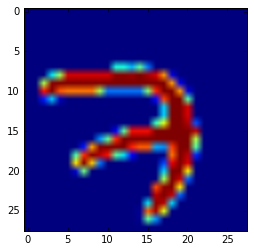

In [6]:
# Encoding X[0] for test
print("\nTest encoding of X[0]:")
# New model, re-using the same session, for weights sharing
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))
plt.imshow(np.reshape(X[0], (28, 28)))

In [1]:

# Testing the image reconstruction on new data (test set)
print("\nVisualizing results after being encoded and decoded:")
X_test = tflearn.data_utils.shuffle(X_test)[0]
# Applying encode and decode over test set
encode_decode = model.predict(testX)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(testX[i].reshape(28, 28, 1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.array(encode_decode[i]).reshape(28, 28, 1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Visualizing results after being encoded and decoded:


NameError: name 'tflearn' is not defined